In [1]:
import numpy as np
import tensorflow as tf
import util
import numpy as np
import tensorflow as tf
import util
import torch
from keras.utils.np_utils import *
from keras.datasets import mnist
MNIST_CLASSIFIER_FROZEN_GRAPH ='/home/imi432_006/huangdengrong/GAN-Research/metrics_gan/metrics/classify_mnist_graph_def.pb'
INPUT_TENSOR = 'inputs:0'
OUTPUT_TENSOR = 'logits:0'
def calculate_labels(images,epoch,global_step):
    label_dict={}
    for i in range(10):
        label_dict[i]=0
    eval_images = tf.convert_to_tensor(images)
    y_logit = util.mnist_logits(eval_images, MNIST_CLASSIFIER_FROZEN_GRAPH, INPUT_TENSOR, OUTPUT_TENSOR)
    labels=tf.argmax(y_logit, 1)
    labels=tf.Session().run(labels)
    for data in labels:
        label_dict[data]+=1
    for i in range(10):
        label_dict[i]=label_dict[i]/len(images)
    max_value=max(label_dict.values())
    min_value=min(label_dict.values())
    print('epoch:%d   global_step:%d'%(epoch,global_step))
    print(label_dict)
    print('chazhi:%.8f'%(max_value-min_value))
    return label_dict,max_value-min_value

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________
____

epoch:7   global_step:7000
{0: 0.0987, 1: 0.1029, 2: 0.0955, 3: 0.1212, 4: 0.0986, 5: 0.0461, 6: 0.0984, 7: 0.132, 8: 0.1124, 9: 0.0942}
chazhi:0.08590000
epoch:7   global_step:7200
{0: 0.1177, 1: 0.1066, 2: 0.0635, 3: 0.1142, 4: 0.1328, 5: 0.0496, 6: 0.0906, 7: 0.1208, 8: 0.1119, 9: 0.0923}
chazhi:0.08320000
epoch:7   global_step:7400
{0: 0.0895, 1: 0.1206, 2: 0.0829, 3: 0.1015, 4: 0.1203, 5: 0.0533, 6: 0.1009, 7: 0.1305, 8: 0.1215, 9: 0.079}
chazhi:0.07720000
epoch:8   global_step:7600
{0: 0.078, 1: 0.111, 2: 0.0762, 3: 0.1178, 4: 0.1565, 5: 0.0599, 6: 0.0928, 7: 0.108, 8: 0.1097, 9: 0.0901}
chazhi:0.09660000
epoch:8   global_step:7800
{0: 0.1089, 1: 0.111, 2: 0.0657, 3: 0.1036, 4: 0.1378, 5: 0.0471, 6: 0.0912, 7: 0.1433, 8: 0.1071, 9: 0.0843}
chazhi:0.09620000
epoch:8   global_step:8000
{0: 0.0904, 1: 0.0913, 2: 0.0628, 3: 0.1095, 4: 0.1332, 5: 0.0514, 6: 0.0969, 7: 0.1301, 8: 0.1369, 9: 0.0975}
chazhi:0.08550000
epoch:8   global_step:8200
{0: 0.0849, 1: 0.1125, 2: 0.093, 3: 0.1063,

epoch:18   global_step:17600
{0: 0.1027, 1: 0.1277, 2: 0.0818, 3: 0.0906, 4: 0.1237, 5: 0.0525, 6: 0.0995, 7: 0.1194, 8: 0.113, 9: 0.0891}
chazhi:0.07520000
epoch:18   global_step:17800
{0: 0.1296, 1: 0.126, 2: 0.0823, 3: 0.0883, 4: 0.0954, 5: 0.0652, 6: 0.1025, 7: 0.1152, 8: 0.1189, 9: 0.0766}
chazhi:0.06440000
epoch:19   global_step:18000
{0: 0.1388, 1: 0.1176, 2: 0.0708, 3: 0.0946, 4: 0.1092, 5: 0.0444, 6: 0.109, 7: 0.1317, 8: 0.1044, 9: 0.0795}
chazhi:0.09440000
epoch:19   global_step:18200
{0: 0.1005, 1: 0.128, 2: 0.0808, 3: 0.1059, 4: 0.1315, 5: 0.0589, 6: 0.1019, 7: 0.1202, 8: 0.1007, 9: 0.0716}
chazhi:0.07260000
epoch:19   global_step:18400
{0: 0.1169, 1: 0.0958, 2: 0.069, 3: 0.116, 4: 0.1076, 5: 0.0701, 6: 0.0939, 7: 0.1205, 8: 0.1154, 9: 0.0948}
chazhi:0.05150000
epoch:19   global_step:18600
{0: 0.1063, 1: 0.1101, 2: 0.0723, 3: 0.1002, 4: 0.0984, 5: 0.0622, 6: 0.0979, 7: 0.1262, 8: 0.1175, 9: 0.1089}
chazhi:0.06400000
epoch:20   global_step:18800
{0: 0.1143, 1: 0.1103, 2: 0.0

No handles with labels found to put in legend.


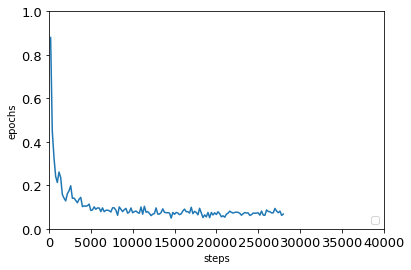

In [6]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam #optimizer of keras

import matplotlib.pyplot as plt

import sys

import numpy as np
import os
class GAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels) #shape of image
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5) #optimizer of gan

        # Build and compile the discriminator,only to keras
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))  #Input():用来实例化一个keras张量
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)


    def build_generator(self):

        model = Sequential()

        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Flatten(input_shape=self.img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
        (X_train, _), (_, _) = mnist.load_data()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.

        X_train = np.expand_dims(X_train, axis=3)  #expand_dims用于扩充数组形状
        print(np.shape(X_train))

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        steps=[]
        values=[]
        nb_batches = int(X_train.shape[0] / batch_size)
        global_step = 0

        for epoch in range(epochs):
            for index in range(nb_batches):
                global_step += 1
                imgs = X_train[index * batch_size:(index + 1) * batch_size]
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
               
                gen_imgs = self.generator.predict(noise)
    
                # Train the discriminator
                d_loss_real = self.discriminator.train_on_batch(imgs, valid)
                d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
                d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
                # Train the generator (to have the discriminator label samples as valid)
                g_loss = self.combined.train_on_batch(noise, valid)
                # If at save interval => save generated image samples
                if global_step % sample_interval == 0:
                    label_dict,value=self.mode_drop(epoch,global_step)
                    steps.append(global_step)
                    values.append(value)
#             plt.subplots(1, 1)
        plt.plot(steps,values)
        plt.xlim([0,40000])
        plt.ylim([0.0,1.0])
        plt.xlabel('steps')
        plt.ylabel('epochs')
        plt.tick_params(axis='both',which='major',labelsize=13)
        plt.legend(loc='lower right')
        if not os.path.isdir('images_gan'):
            os.mkdir('images_gan')
        plt.savefig("images_gan/mode_drop.png")
        plt.show()

    def sample_images(self, epoch):
        r, c = 10, 10
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)
        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cnt += 1

        if not os.path.isdir('images_gan'):
            os.mkdir('images_gan')
        fig.savefig("images_gan/%d.png" % epoch)
        plt.close()
    def mode_drop(self,epoch,global_step):
        r, c = 10, 1000
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)
        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5
        label_dict,value=calculate_labels(gen_imgs,epoch,global_step)
        return label_dict,value
if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=30, batch_size=64, sample_interval=200)
